### Ant Colony optimization

El comportamiento de busqueda de aliemnto de las colonias de hormigas se base estudiando exahustivamente y biónica correspondiente a este comportamiento diversas aplicaciones

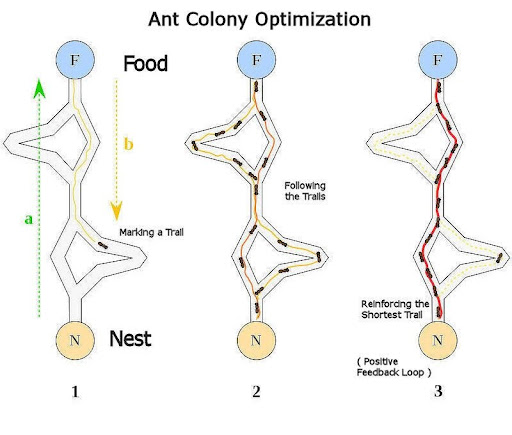

El algotitmo de hormigas (ACO)
Es una metaheurística inspirrada en el comportamiento de las horomigas cuando buscan el camino más corto

#### Fenemono de las feromónas 
- Las hormigas al moverse liberan una sistancia quimica llamda fenomóna
- Señal de camino
- Las hormigas eligen el que tiene más fenomónas
- Las fenomónas se evaporan por el tiempo

## Componentes claves

El algoritmo simula este comportemiento en un entorno computacional (generalemren un grafo, donde los nodo son estdso y las aristas, son trsnsiciones)


- Hormigas artificiales: Agentes que contruyen soluciones
- Rasto de feromoás ($T$): Un valor numérico a cada arista del grafio que repesenta la calidad de es parte del camino
- Visibilidad ($\eta$): Información local especificado del programa
- Probabilidad de transición: Formula que usa la hormiga para decidir a que nodo moverse. Combina la inflecua de la feromona y heurística
- Evaporación ($p$): Una dunción que recude 
- Deposito de feromonas: La cantidad de feromónas que cada hormiga añade

## Procedimiento genera
1. Incicialización
- Se define los paramentros del algoritmo
- Se incialilza los rastros de feromonas $T_{ij}$ a un valor pequeño

2. Construir solución
- Todas las hormigas artificiales se colocan en nodos artificiales.
- Cada hormiga, de forma independiente, construye una solución
completa
3. Evaluación de solución
- Una vez que todas las hormigas han completado su camino, se evalúa
la calidad de la solución encontrada por cada hormiga
4. Acurlizarción global del rastro de la hormiga
Evaporación: se aplica la tasa de evaporación $p$ a todas las aristas
para disminuir los rastros existentes


Depósito: las hormigas que encontraron las mejores soluciones depositan
feromona en las aristas de su camino. El depósito es inversamente
proporcional al costo del camino 

$
T_{ij} = T_{ij} + \sum{Δ T^k}
$

5. Criterio de paro.
- Los pasos 2 a 4 se repiten hasta que se cumple un criterio de paro (se
alcanza un número máximo de iteraciones o la mejor solución no mejora
durante un tiempo).

In [9]:
import random
import math

# --- 1. PARÁMETROS DEL PROBLEMA ---

GRAFO_DISTANCIAS = {
    1: {2: 5.0, 3: 3.1, 6: 5.2},
    2: {1: 5.0, 3: 4.9, 7: 5.2},
    3: {1: 3.1, 2: 4.9, 6: 3.2, 7: 3.0, 5: 6.0},
    4: {7: 4.8, 5: 5.5},
    5: {3: 6.0, 6: 4.7, 4: 5.5},
    6: {1: 5.2, 3: 3.2, 5: 4.7},
    7: {2: 5.2, 3: 3.0, 4: 4.8}
}

NODO_INICIO = 1
NODO_FINAL = 4
TODOS_NODOS = [1, 2, 3, 4, 5, 6, 7]
NUM_NODOS = len(TODOS_NODOS)

# --- 2. PARÁMETROS ACO ---
NUM_HORMIGAS = 5
NUM_ITERACIONES = 50
RHO = 0.01       # Tasa de evaporación
Q = 1.0          # Constante de depósito de feromona
ALFA = 1.0       # Influencia del rastro de feromona
BETA = 1.0       # Influencia de la heurística (visibilidad)

# --- 3. FUNCIONES PRINCIPALES ---

def inicializar_feromonas(grafo):
    feromonas = {}
    for i in grafo:
        feromonas[i] = {}
        for j in grafo[i]:
            feromonas[i][j] = 0.1  # valor inicial
    return feromonas


def probabilidad_movimiento(actual, nodos_no_visitados, feromonas, grafo, alpha, beta):
    total = 0.0
    probabilidades = {}

    # Calcula el denominador (la suma de todos los pesos posibles)
    for siguiente in nodos_no_visitados:
        if siguiente in grafo[actual]:
            tau = feromonas[actual][siguiente]
            eta = 1.0 / grafo[actual][siguiente]
            total += (tau ** alpha) * (eta ** beta)

    # Calcula la probabilidad normalizada para cada destino
    for siguiente in nodos_no_visitados:
        if siguiente in grafo[actual]:
            tau = feromonas[actual][siguiente]
            eta = 1.0 / grafo[actual][siguiente]
            prob = ((tau ** alpha) * (eta ** beta)) / total
            probabilidades[siguiente] = prob

    return probabilidades


def seleccionar_nodo(probabilidades):
    r = random.random()
    acumulada = 0.0
    for nodo, prob in probabilidades.items():
        acumulada += prob
        if r <= acumulada:
            return nodo
    # Si por redondeo no se elige ninguno
    return list(probabilidades.keys())[-1]


def construir_ruta(feromonas, grafo, alpha, beta):
    ruta = [NODO_INICIO]
    actual = NODO_INICIO
    nodos_no_visitados = TODOS_NODOS.copy()
    nodos_no_visitados.remove(actual)

    while actual != NODO_FINAL and len(nodos_no_visitados) > 0:
        probabilidades = probabilidad_movimiento(actual, nodos_no_visitados, feromonas, grafo, alpha, beta)
        if not probabilidades:
            break
        siguiente = seleccionar_nodo(probabilidades)
        ruta.append(siguiente)
        actual = siguiente
        if siguiente in nodos_no_visitados:
            nodos_no_visitados.remove(siguiente)

    return ruta


def calcular_longitud_ruta(ruta, grafo):
    distancia = 0.0
    for i in range(len(ruta) - 1):
        a, b = ruta[i], ruta[i+1]
        if b in grafo[a]:
            distancia += grafo[a][b]
        else:
            # Si no existe conexión directa, penalizamos
            distancia += 9999
    return distancia


def actualizar_feromonas(feromonas, rutas, distancias, rho, q):
    # Evaporación
    for i in feromonas:
        for j in feromonas[i]:
            feromonas[i][j] *= (1 - rho)

    # Deposito de feromonas
    for k in range(len(rutas)):
        ruta = rutas[k]
        dist = distancias[k]
        for i in range(len(ruta) - 1):
            a, b = ruta[i], ruta[i+1]
            if b in feromonas[a]:
                feromonas[a][b] += q / dist


def aco():
    feromonas = inicializar_feromonas(GRAFO_DISTANCIAS)
    mejor_ruta = None
    mejor_distancia = math.inf

    for iteracion in range(NUM_ITERACIONES):
        rutas = []
        distancias = []

        for i in range(NUM_HORMIGAS):
            ruta = construir_ruta(feromonas, GRAFO_DISTANCIAS, ALFA, BETA)
            distancia = calcular_longitud_ruta(ruta, GRAFO_DISTANCIAS)
            rutas.append(ruta)
            distancias.append(distancia)

            if distancia < mejor_distancia and ruta[-1] == NODO_FINAL:
                mejor_ruta = ruta
                mejor_distancia = distancia

        actualizar_feromonas(feromonas, rutas, distancias, RHO, Q)

        print(f"Iteración {iteracion+1}: Mejor distancia = {mejor_distancia:.3f}")

    print("\n--- RESULTADO FINAL ---")
    print(f"Mejor ruta encontrada: {mejor_ruta}")
    print(f"Distancia total: {mejor_distancia:.3f}")

In [10]:


# --- 4. EJECUCIÓN ---
if __name__ == "__main__":
    aco()


Iteración 1: Mejor distancia = 15.400
Iteración 2: Mejor distancia = 15.400
Iteración 3: Mejor distancia = 15.400
Iteración 4: Mejor distancia = 14.600
Iteración 5: Mejor distancia = 14.600
Iteración 6: Mejor distancia = 14.600
Iteración 7: Mejor distancia = 10.900
Iteración 8: Mejor distancia = 10.900
Iteración 9: Mejor distancia = 10.900
Iteración 10: Mejor distancia = 10.900
Iteración 11: Mejor distancia = 10.900
Iteración 12: Mejor distancia = 10.900
Iteración 13: Mejor distancia = 10.900
Iteración 14: Mejor distancia = 10.900
Iteración 15: Mejor distancia = 10.900
Iteración 16: Mejor distancia = 10.900
Iteración 17: Mejor distancia = 10.900
Iteración 18: Mejor distancia = 10.900
Iteración 19: Mejor distancia = 10.900
Iteración 20: Mejor distancia = 10.900
Iteración 21: Mejor distancia = 10.900
Iteración 22: Mejor distancia = 10.900
Iteración 23: Mejor distancia = 10.900
Iteración 24: Mejor distancia = 10.900
Iteración 25: Mejor distancia = 10.900
Iteración 26: Mejor distancia = 10